In [ ]:
Regression data public (candy-data.csv)
Rayyan Ramanda (1103200202)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd

# Ganti path sesuai dengan lokasi dataset CSV di Google Drive Anda
file_path = '/content/drive/MyDrive/Colab Notebooks/candy-data.csv'

# Membaca dataset
dataset = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dataset
print(dataset.head())

  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465  


In [13]:
# Menampilkan info dari dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [14]:
dataset.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [16]:
categorical_data = dataset[['chocolate','fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus']]
continuous_data = dataset[['sugarpercent','pricepercent','winpercent']]

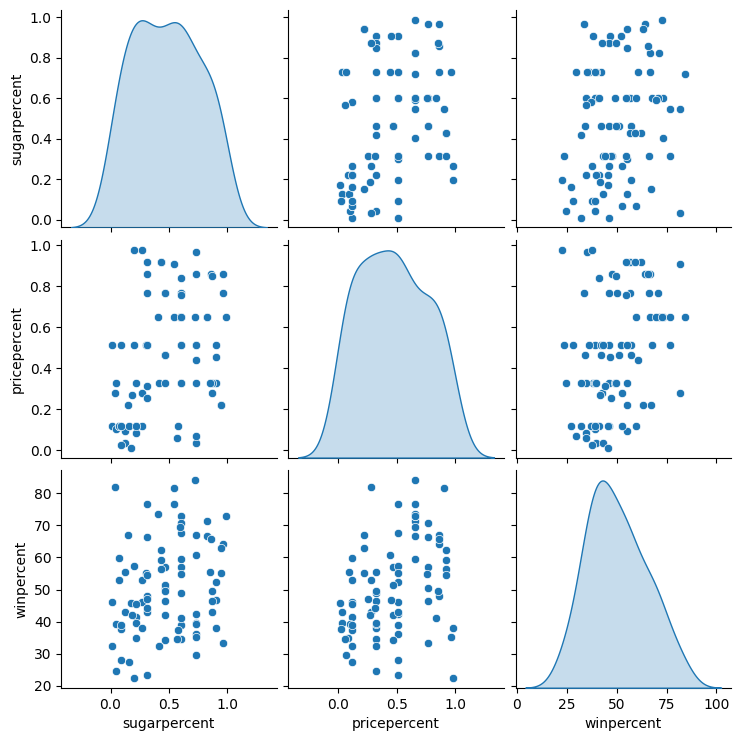

In [17]:
# Melakukan check distribution

sns.pairplot(data= continuous_data, diag_kind='kde')

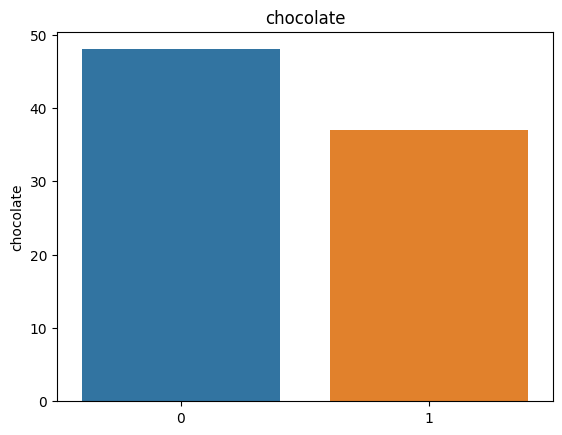

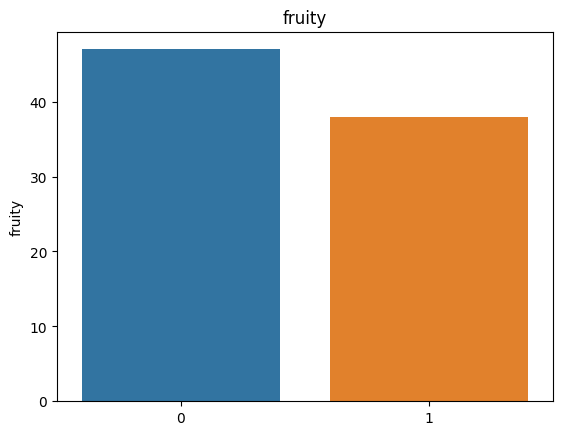

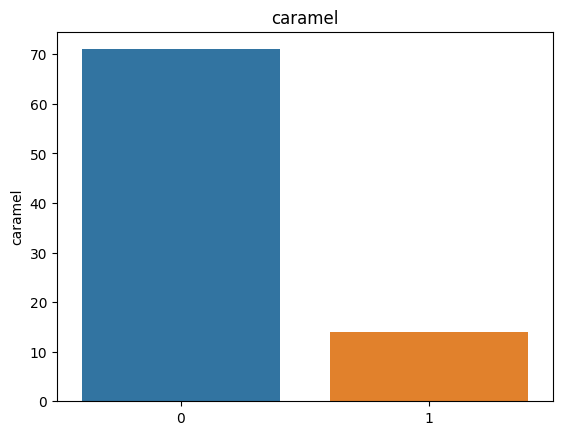

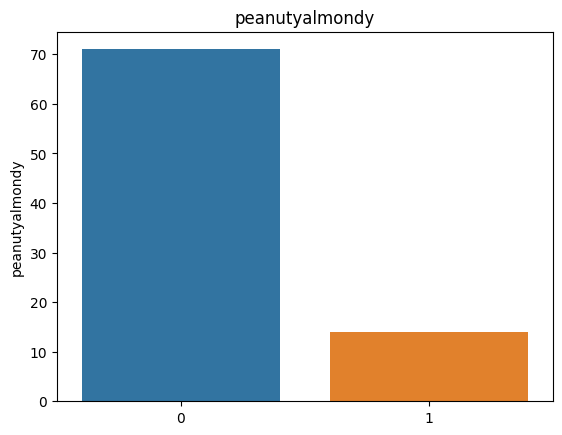

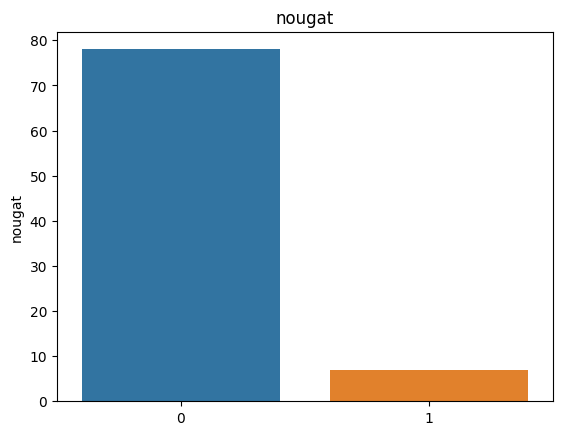

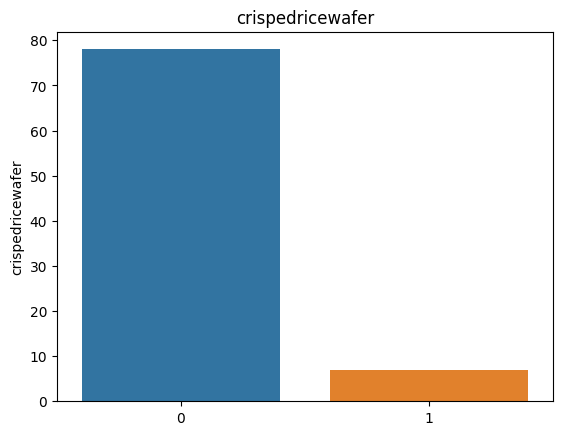

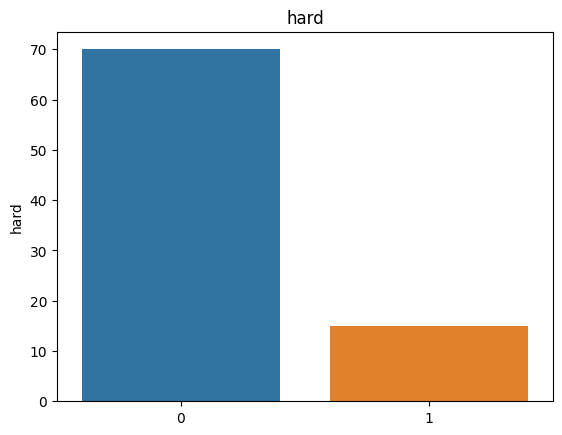

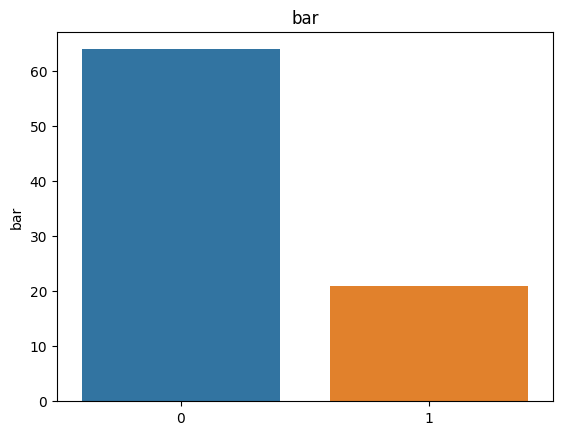

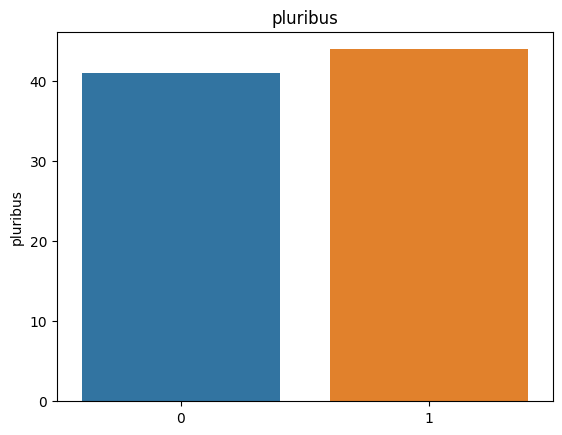

In [19]:
# Memvisualisasikan dengan distribution bar

for i in categorical_data.columns:
    sns.barplot(x = categorical_data[i].value_counts().index, y = categorical_data[i].value_counts()).set_title(i)
    plt.show()

<ipython-input-21-b96c70c3567d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True)


<Axes: >

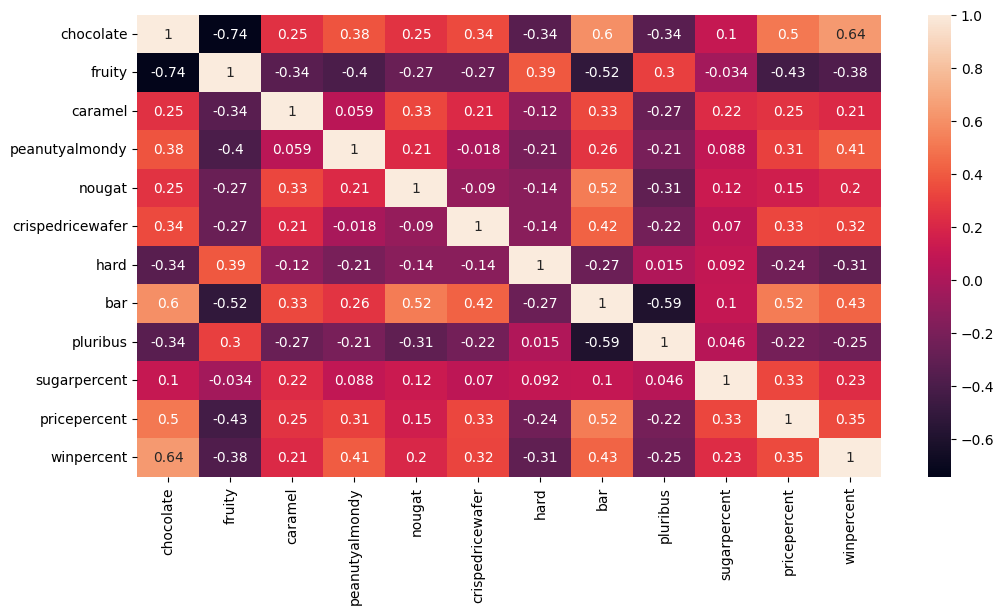

In [21]:
#mendapatkan lebih banyak informasi dari dataset
#periksa korelasi antar fitur dalam dataset

plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(), annot = True)

In [28]:
#membuat fungsi untuk menentukan winpercent
def probability(percent):
    if percent <= 20:
        return 1
    elif percent > 20 and percent <= 40:
        return 2
    elif percent > 40 and percent <= 60:
        return 3
    elif percent > 60 and percent <= 80:
        return 4
    else:
        return 5

In [29]:
dataset['winpercent'] = dataset['winpercent'].apply(lambda x: probability(x))

Text(0.5, 1.0, 'winpercent')

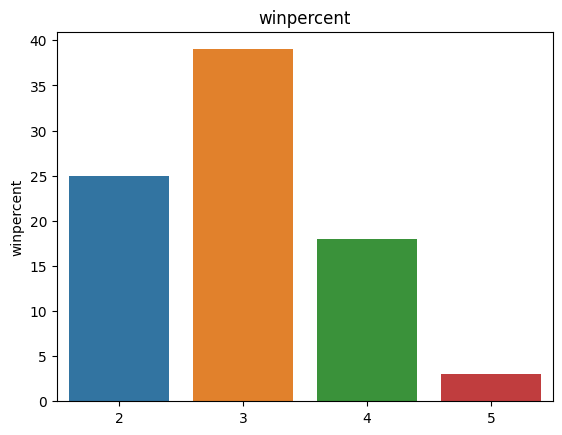

In [31]:
#VIsualisasi data winpercent
sns.barplot(x = dataset['winpercent'].value_counts().index, y = dataset['winpercent'].value_counts()).set_title('winpercent')

In [32]:
df_train, df_test = train_test_split(dataset, test_size = 0.2, random_state = 1)

In [33]:
X_train = df_train.drop(columns = 'winpercent')
y_train = df_train['winpercent']

X_test = df_test.drop(columns = 'winpercent')
y_test = df_test['winpercent']

In [34]:
print(X_train.shape)
print(y_train.shape)

(68, 11)
(68,)


In [35]:
print(X_test.shape)
print(y_test.shape)

(17, 11)
(17,)


In [36]:
model_logistic_regression = LogisticRegression(multi_class='ovr', solver='lbfgs', penalty= 'none')

In [37]:
model_fitted_logistic = model_logistic_regression.fit(X_train, y_train)
print(f"Model Accuracy: {model_fitted_logistic.score(X_test, y_test)}")

Model Accuracy: 0.5294117647058824


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
